<a href="https://colab.research.google.com/github/carolinehagood/ds4002-project3/blob/main/CNN_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import requests
from io import BytesIO
import gzip
from io import BytesIO
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [104]:
#Downloading url images
file_urls = ['https://github.com/carolinehagood/ds4002-project3/raw/refs/heads/main/Data/n02085936-Maltese_dog%20(3).csv.gz',
             'https://github.com/carolinehagood/ds4002-project3/raw/refs/heads/main/Data/n02088364-beagle%20(1).csv.gz',
             'https://github.com/carolinehagood/ds4002-project3/raw/refs/heads/main/Data/n02099601-golden_retriever%20(1).csv.gz',
             'https://github.com/carolinehagood/ds4002-project3/raw/refs/heads/main/Data/n02106662-German_shepherd%20(2).csv.gz'
             ]
data_frames = []
for url in file_urls:
    response = requests.get(url)
    compressed_file = BytesIO(response.content)  # Create a BytesIO object
    with gzip.open(compressed_file, 'rt') as f:  # Open it as a text file
        df = pd.read_csv(f)  # Read the CSV file into a DataFrame
        data_frames.append(df)

In [105]:
# Combine all DataFrames into a single DataFrame
data_df = pd.concat(data_frames, ignore_index=True)

# Print the DataFrame to check
print(data_df.head(1))

          0         1         2         3        4         5         6  \
0  0.141176  0.133333  0.082353  0.156863  0.14902  0.098039  0.164706   

          7         8         9  ...     49144     49145     49146     49147  \
0  0.156863  0.105882  0.172549  ...  0.223529  0.180392  0.188235  0.172549   

     49148     49149     49150     49151  breed             breed_name  
0  0.12549  0.164706  0.141176  0.098039      0  n02085936-Maltese_dog  

[1 rows x 49154 columns]


In [106]:
data_df

,0,1,2,3,4,5,6,7,8,9,...,49144,49145,49146,49147,49148,49149,49150,49151,breed,breed_name
0,0.141176,0.133333,0.082353,0.156863,0.149020,0.098039,0.164706,0.156863,0.105882,0.172549,...,0.223529,0.180392,0.188235,0.172549,0.125490,0.164706,0.141176,0.098039,0,n02085936-Maltese_dog
1,0.470588,0.482353,0.501961,0.380392,0.392157,0.411765,0.337255,0.349020,0.368627,0.329412,...,0.788235,0.733333,0.768627,0.772549,0.717647,0.764706,0.768627,0.713725,0,n02085936-Maltese_dog
2,0.545098,0.529412,0.482353,0.552941,0.537255,0.490196,0.552941,0.537255,0.490196,0.556863,...,0.141176,0.062745,0.258824,0.196078,0.117647,0.313725,0.266667,0.196078,0,n02085936-Maltese_dog
3,0.015686,0.023529,0.019608,0.035294,0.043137,0.039216,0.039216,0.047059,0.043137,0.035294,...,0.372549,0.360784,0.403922,0.407843,0.396078,0.372549,0.368627,0.360784,0,n02085936-Maltese_dog
4,0.215686,0.211765,0.176471,0.235294,0.227451,0.188235,0.196078,0.192157,0.145098,0.211765,...,0.392157,0.321569,0.619608,0.494118,0.427451,0.694118,0.576471,0.517647,0,n02085936-Maltese_dog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,0.278431,0.317647,0.262745,0.349020,0.368627,0.349020,0.254902,0.254902,0.239216,0.270588,...,0.647059,0.486275,0.670588,0.580392,0.431373,0.694118,0.619608,0.466667,3,n02106662-German_shepherd
688,0.537255,0.627451,0.352941,0.541176,0.631373,0.356863,0.513725,0.615686,0.337255,0.521569,...,0.415686,0.168627,0.345098,0.447059,0.172549,0.341176,0.447059,0.168627,3,n02106662-German_shepherd
689,0.305882,0.290196,0.313725,0.329412,0.313725,0.352941,0.333333,0.317647,0.356863,0.337255,...,0.247059,0.274510,0.192157,0.250980,0.282353,0.180392,0.235294,0.286275,3,n02106662-German_shepherd
690,0.584314,0.686275,0.831373,0.576471,0.678431,0.823529,0.564706,0.666667,0.815686,0.560784,...,0.580392,0.501961,0.549020,0.600000,0.521569,0.654902,0.705882,0.623529,3,n02106662-German_shepherd


In [107]:
if data_df['breed_name'].value_counts()['n02085936-Maltese_dog'] > 100:
    data_df = data_df.drop(
        data_df[data_df['breed_name'] == 'n02085936-Maltese_dog'].iloc[100:].index
    )

In [108]:
data_df['breed_name'] = data_df['breed_name'].str.split('-').str[1]

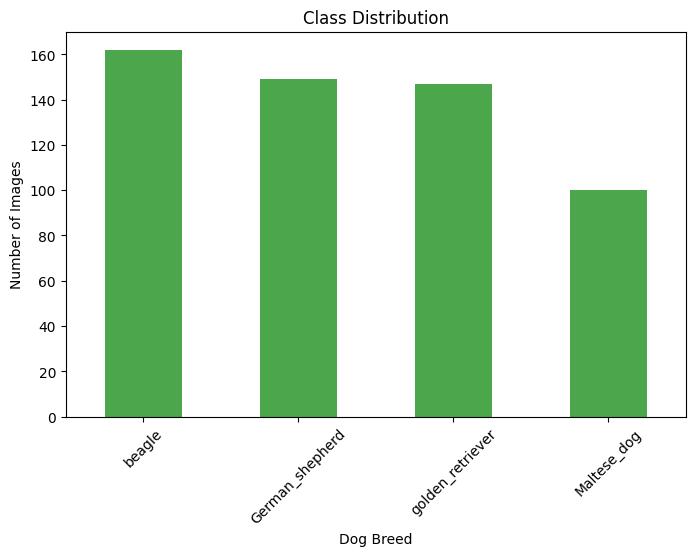

In [109]:
#class distribution
import matplotlib.pyplot as plt

# Count the number of samples per breed
class_counts = data_df['breed_name'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color='green', alpha=0.7)
plt.title("Class Distribution")
plt.xlabel("Dog Breed")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

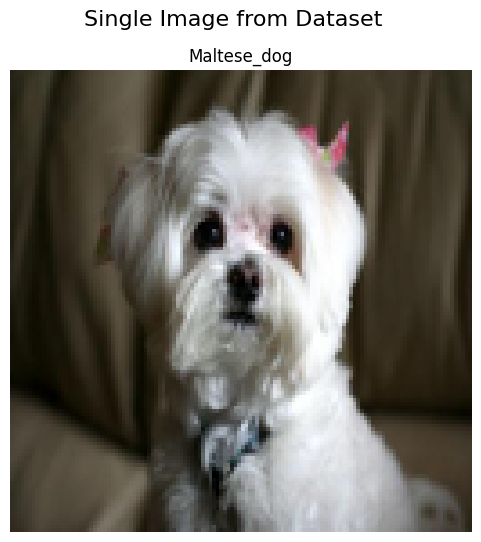

In [110]:
#sample image visualization

# Define the correct dimensions for the image
image_dim = (128, 128, 3)  # If the actual size is 128x128
image_data = data_df.iloc[0, :-2].values.astype('float32').reshape(image_dim)

# Plot the image
plt.figure(figsize=(6, 6))
plt.imshow(image_data)
plt.title(data_df['breed_name'].iloc[0])  # Display the breed name as the title
plt.axis("off")
plt.suptitle("Single Image from Dataset", fontsize=16)
plt.show()

In [111]:
#Image Mean and Standard Deviation per Breed

breed_counts = data_df['breed'].value_counts()
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate mean and std dev per breed
def get_mean_std_for_breed(breed_data):
    flattened_data = breed_data.values.reshape(len(breed_data), -1)  # Flatten each image
    mean = np.mean(flattened_data, axis=1)  # Mean of pixel values for each image
    std = np.std(flattened_data, axis=1)  # Standard deviation of pixel values for each image
    return np.mean(mean), np.mean(std)  # Return the average mean and std for the breed


<ipython-input-112-37ac2d8b8981>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  breed_stats = data_df.groupby('breed').apply(lambda x: get_mean_std_for_breed(x.iloc[:, :-2]))


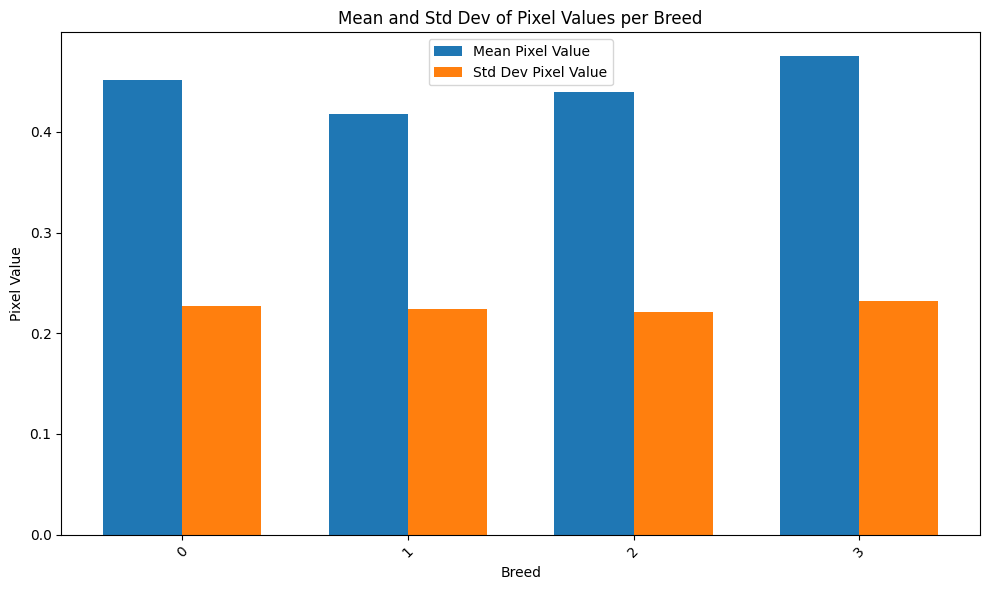

In [112]:
# Ensure that we handle varying image counts correctly
breed_stats = data_df.groupby('breed').apply(lambda x: get_mean_std_for_breed(x.iloc[:, :-2]))

# Unpack the results into separate mean and std arrays
mean_values = breed_stats.apply(lambda x: x[0])
std_values = breed_stats.apply(lambda x: x[1])

# Plotting
plt.figure(figsize=(10, 6))
breeds = breed_stats.index
bar_width = 0.35
x = np.arange(len(breeds))


# Bar chart with mean and std dev values
plt.bar(x - bar_width / 2, mean_values, bar_width, label='Mean Pixel Value')
plt.bar(x + bar_width / 2, std_values, bar_width, label='Std Dev Pixel Value')

plt.xlabel('Breed')
plt.ylabel('Pixel Value')
plt.title('Mean and Std Dev of Pixel Values per Breed')
plt.xticks(x, breeds, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [113]:
print(data_df['breed'].unique())  # Check unique values
print(data_df['breed'].isna().sum())  # Check for NaN values

[0 1 2 3]
0


In [114]:
# Ensure breed is an integer column (convert if needed)
data_df['breed'] = data_df['breed'].astype(int)

In [115]:
X = data_df.iloc[:, :-2].values  # All columns except the last two
print(X.shape)

(558, 49152)


In [116]:
y = data_df['breed'].values  # Labels are from the 'breed' column
print(y.shape)

(558,)


In [117]:
# Set constants

IMAGE_HEIGHT, IMAGE_WIDTH, CHANNELS = 128, 128, 3
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = 4  #number of dog breeds

In [118]:
from sklearn.preprocessing import LabelEncoder

# # Normalize X
# X = X / 255.0  # Scale pixel values to [0, 1]

# # Reshape X to (height, width, channels) for 128x128 images
# X = X.reshape(-1, 128, 128, 3)  # 128x128 images with 3 color channels (RGB)


# # Encode labels (y) into integers and then one-hot encode
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)
# y_onehot = to_categorical(y_encoded)

# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# # Data augmentation
# data_augmentation = ImageDataGenerator(
#     rotation_range=30,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     zoom_range=0.2,
#     shear_range=0.2,
#     fill_mode='nearest'
# )

In [119]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.preprocessing import LabelEncoder

# Reshape X to (height, width, channels) for 128x128 images
X = X.reshape(-1, 128, 128, 3)

# Normalize X
X = X / 255.0

# Encode labels (y) into integers and then one-hot encode
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, stratify=y, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Data augmentation
augmented_data = data_augmentation.flow(X_train, y_train, batch_size=32)

# TEST

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [127]:
model = keras.Sequential()

In [128]:
model.add(keras.layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, CHANNELS)))
model.add(keras.layers.AveragePooling2D(2, 2))


In [129]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu'))


In [130]:
model.add(keras.layers.AveragePooling2D(2, 2))
# Add one more convolutional layer with 64 filters and ReLU activation
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu'))

In [131]:
DROPOUT_FACTOR = 0.2

In [132]:
model.add(keras.layers.Dropout(DROPOUT_FACTOR))
model.add(keras.layers.AveragePooling2D(2, 2))

In [133]:
# Flatten layer to convert the 3D feature maps into a 1D feature vector
model.add(keras.layers.Flatten())
# Dense (fully connected) layer with 64 neurons and ReLU activation
model.add(keras.layers.Dense(64, activation='relu'))


In [134]:
# Dense layer with 64 neurons and ReLU activation
model.add(keras.layers.Dense(64, activation='relu'))
# Output layer with 'num_classes' neurons and softmax activation, representing class probabilities
model.add(keras.layers.Dense(NUM_CLASSES, activation='softmax', name='classifier_head'))


In [135]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [136]:
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 347ms/step - accuracy: 0.2731 - loss: 1.3827
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 333ms/step - accuracy: 0.2835 - loss: 1.3498
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 305ms/step - accuracy: 0.2964 - loss: 1.3713
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 479ms/step - accuracy: 0.3167 - loss: 1.3692
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 310ms/step - accuracy: 0.2399 - loss: 1.3741
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 309ms/step - accuracy: 0.2566 - loss: 1.3648
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 394ms/step - accuracy: 0.2927 - loss: 1.3698
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 304ms/step - accuracy: 0.2960 - loss: 1.3744
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 355ms/step - accuracy: 0.3221 - loss: 1.3694
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 311ms/step - accuracy: 0.2900 - loss: 1.3702
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 304ms/step - accuracy: 0.2740 - loss: 1.3775
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 458ms/step

In [137]:
accuracy = history.history['accuracy'][-1]
print(f"Training accuracy: {accuracy}")

Training accuracy: 0.2921348214149475


In [138]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.2731 - loss: 1.3704
Test Accuracy: 29.46%
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.29      1.00      0.46        33
           2       0.00      0.00      0.00        29
           3       0.00      0.00      0.00        30

    accuracy                           0.29       112
   macro avg       0.07      0.25      0.11       112
weighted avg       0.09      0.29      0.13       112



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


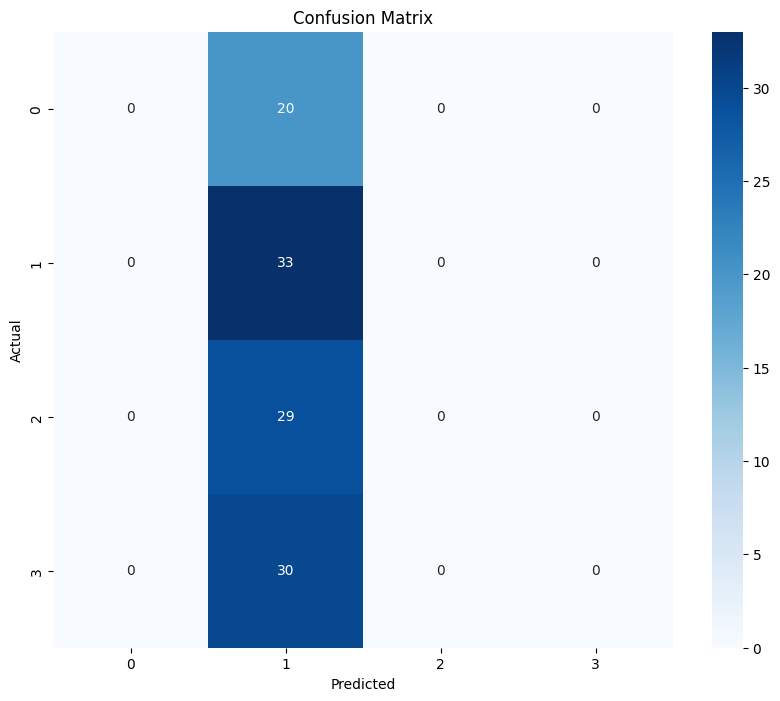

In [139]:
# Classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=[str(cls) for cls in label_encoder.classes_])) # Convert label_encoder.classes_ elements to strings

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(cls) for cls in label_encoder.classes_], yticklabels=[str(cls) for cls in label_encoder.classes_]) # Convert label_encoder.classes_ elements to strings for xticklabels and yticklabels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()